In [ ]:
# <1.>
# 유방암 환자의 자료로 유방암 검증 
# 의미있는 속성을 검색하기 위해서 그래프를 활용 
# 속성중의 의미있는 속성만 추출하여 X 작성
# 클래스 -> y 작성
# 모델 실행 후 마지막 정확도 출력

# <2.> 
# titanic 자료를 seaborn에서 load한 후에 
# 속성자료가 object 인 속성의 클래스 데이터를 one-hot encoding
# 속성자료가 object 인데 클래스가 아닌 속성은 제거 
# 생존여부 -> alive : yes 또는 no 인경우 하나의 값으로 출력 
# 생존에 영향을 끼치는 속성만 추출하여 모델 생성 후 학습 시킴

# <3.>
# load_wine 을 실행해서 다항분류의 모델링을 학습시킴


In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.utils import normalize
import tensorflow as tf

In [2]:
# 모델 생성 함수
def create_mlp(input_size, hidden_sizes, output_size):
    model = Sequential()
    model.add(Dense(hidden_sizes[0], input_dim=input_size, activation='relu'))
    for hidden_size in hidden_sizes[1:]:
        model.add(Dense(hidden_size, activation='relu'))
    
    if output_size == 1:
        act_func = 'sigmoid'
    else:
        act_func = 'softmax'
    model.add(Dense(output_size, activation=act_func))
    return model



In [3]:
# 1. 유방암 자료를 가지고 딥러닝 학습
from sklearn.datasets import load_breast_cancer, load_wine

Data = load_breast_cancer() 
X = Data['data']       # 학습 데이터
y = Data['target']     # 타겟 데이터


In [4]:
# 전체 속성으로 모델 학습
input_size = X.shape[1]
hidden_sizes = [50,50,30]
output_size = 1
model = create_mlp(input_size, hidden_sizes, output_size)

model.compile(loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X, y, epochs=200, verbose=False)

print("마지막 정확도 : ", hist.history['accuracy'][-1])

마지막 정확도 :  0.9349736571311951


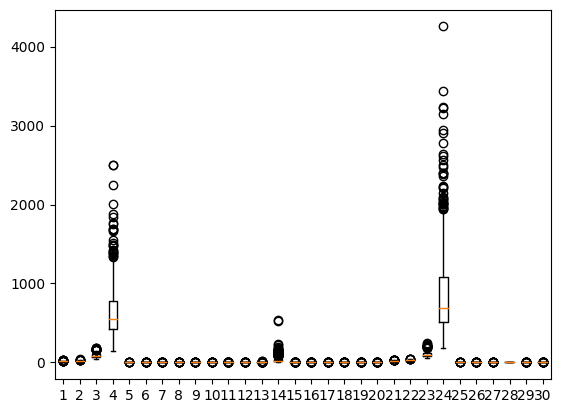

In [5]:
# boxplot 으로 이상점 확인
plt.boxplot(X)
plt.show()

In [6]:
# X 속성중 인덱스 3, 13, 23 데이터 확인 
X_copy = X.copy()
X = X[ :, [3,13,23]]

In [7]:

input_size = X.shape[1]
hidden_sizes = [50,50,30]
output_size = 1
model = create_mlp(input_size, hidden_sizes, output_size)

model.compile(loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X, y, epochs=200, verbose=False)
print("마지막 정확도 : ", hist.history['accuracy'][-1])

마지막 정확도 :  0.927943766117096


In [8]:
# 2. titanic 자료를 seaborn에서 load한 후에 
# 모델 생성 함수
# Load the Titanic dataset from seaborn
titanic = sns.load_dataset('titanic')

# Drop columns with more than 500 NaN values
titanic.dropna(thresh=500, axis=1, inplace=True)

# Drop rows with NaN values
titanic.dropna(axis=0, inplace=True)

# Remove 'survived' and 'alive' columns
X = titanic.drop(['survived', 'alive'], axis=1)

# Remove columns with object data type
X = X.select_dtypes(exclude='object')

# Perform one-hot encoding for the 'class' column
X = pd.get_dummies(X, columns=['class'])

n_columns = X.select_dtypes(include=['float64', 'int64']).columns
X[n_columns] = normalize(X[n_columns])

# Extract the target variable
X = X.values.astype(np.float32)
y = np.array(titanic['alive'].map({'no': 0, 'yes': 1}))


In [11]:

# Model creation
input_size = X.shape[1]
hidden_sizes = [20, 10]
output_size = 1
model = create_mlp(input_size, hidden_sizes, output_size)

model.compile(loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X, y, epochs=200, verbose=False)
print("Final accuracy:", hist.history['accuracy'][-1])


Final accuracy: 0.834269642829895


In [10]:
y

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,

In [12]:
# <3.>
# load_wine 을 실행해서 다항분류의 모델링을 학습시킴
data_wine = load_wine() 
X = data_wine['data']
y = data_wine['target']
y = pd.get_dummies(y)  # class 로 변경

# Model creation
input_size = X.shape[1]
hidden_sizes = [20, 10]
output_size = 3
model = create_mlp(input_size, hidden_sizes, output_size)

model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(X, y, epochs=200, verbose=False)
print("Final accuracy:", hist.history['accuracy'][-1])

Final accuracy: 0.8426966071128845
